In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=2, 
                            centers=4, 
                            cluster_std=1.5,
                            random_state=42)

X_blob[:5], y_blob[:5]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1]))

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).long()

cpu


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)

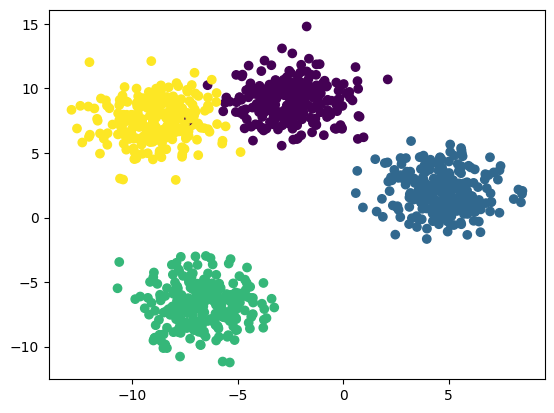

In [5]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

In [6]:
class BlobClassfication(nn.Module):
    def __init__(self, input_features, output_features, hidden_units):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.Linear(hidden_units, hidden_units),
            nn.Linear(hidden_units, output_features)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [7]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [8]:
X_train[:2]

tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260]])

In [9]:
model = BlobClassfication(2, 4, 10).to(device)
model



BlobClassfication(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [11]:
# y_hat = torch.argmax(torch.softmax(model(X_train), dim=1), dim=1)

y_logits = model(X_train)
y_hat = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_logits[:10], y_hat[:10], y_train[:10]



(tensor([[ 0.4735, -0.4219,  0.1566, -1.0413],
         [ 0.8781, -0.6815,  0.4162,  0.5326],
         [-0.2567,  1.0431,  0.3378,  1.0784],
         [ 0.0220,  0.5814,  0.3322,  0.7544],
         [ 0.7369, -0.4677,  0.4060,  0.5971],
         [ 0.7627, -0.6516,  0.3134, -0.1361],
         [ 0.9117, -0.6654,  0.4623,  0.8506],
         [ 0.4310, -0.3211,  0.1773, -0.8403],
         [ 0.6380, -0.1793,  0.4891,  1.3313],
         [ 0.8194, -0.5626,  0.4316,  0.7088]], grad_fn=<SliceBackward0>),
 tensor([0, 0, 3, 3, 0, 0, 0, 0, 3, 0]),
 tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0]))

In [12]:
# y_logits = model(X_train)
# y_hat = torch.softmax(y_logits, dim=1).argmax(dim=1)

# loss = loss_fn(y_logits, y_train)


In [13]:
epochs = 200

epoch_list = []
train_loss = []
test_loss = []


for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    y_hat = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
        y_logits_test = model(X_test)
        y_hat_test =  torch.argmax(torch.softmax(y_logits_test, dim=1), dim=1)
        loss_test = loss_fn(y_logits_test, y_test)

    if epoch % 10 == 0:
        train_loss.append(loss.item())
        test_loss.append(loss_test.item())
        epoch_list.append(epoch)


In [14]:
epoch_list[:5], train_loss[:5], test_loss[:5]

([0, 10, 20, 30, 40],
 [1.2166202068328857,
  0.16005776822566986,
  0.08740950375795364,
  0.06311086565256119,
  0.05151255428791046],
 [0.6429591178894043,
  0.14467577636241913,
  0.07916510850191116,
  0.055571455508470535,
  0.04391450434923172])

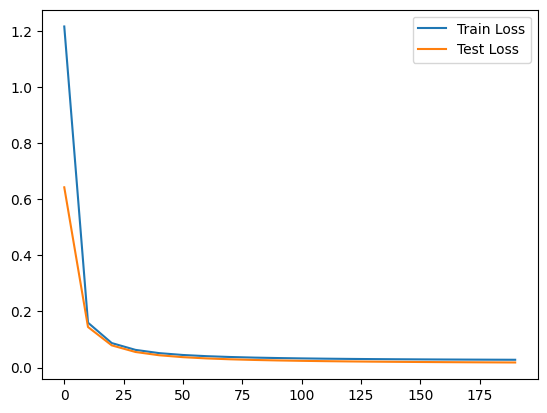

In [15]:
plt.plot(epoch_list, train_loss, label="Train Loss")
plt.plot(epoch_list, test_loss, label="Test Loss")
plt.legend()

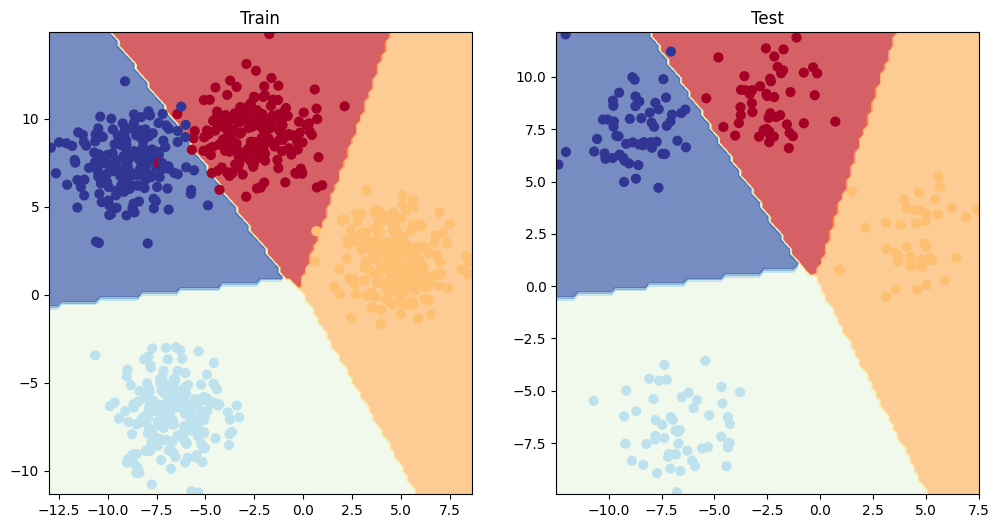

In [16]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [21]:
from torchmetrics import Accuracy

torchmetric_acuracy = Accuracy(task=).to(device)

# torchmetric_acuracy(y_hat, y_train)
# , torchmetric_acuracy(y_hat_test, y_test)

SyntaxError: invalid syntax (2920977547.py, line 3)

In [19]:

torchmetric_acuracy.device 

NameError: name 'torchmetric_acuracy' is not defined